In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import numpy as np

In [44]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pickle

# Assuming the file 'dropout.csv' is in the same directory as the notebook
# and has the structure as described by the user
# Read the dataset
dropout_data = pd.read_csv("dropout.csv", delimiter=';')

# The user wants to apply OneHotEncoding to the categorical features
categorical_features = ['Marital status',
                        'Application mode', 
                        'Course',
                        'Daytime/evening attendance\t', 
                        'Previous qualification',
                        'Displaced',
                        'Debtor', 
                        'Tuition fees up to date', 
                        'Gender', 
                        'Scholarship holder']

numeric_features = ['Application order', 
                    'Age at enrollment', 
                    'Admission grade',
                    'Previous qualification (grade)',
                    'Curricular units 1st sem (credited)',
                    'Curricular units 1st sem (enrolled)',
                    'Curricular units 1st sem (evaluations)',
                    'Curricular units 1st sem (approved)',
                    'Curricular units 1st sem (grade)',
                    'Curricular units 2nd sem (credited)',
                    'Curricular units 2nd sem (enrolled)',
                    'Curricular units 2nd sem (evaluations)',
                    'Curricular units 2nd sem (approved)',
                    'Curricular units 2nd sem (grade)', 
                    'GDP']

# Convert the 'Target' column into numeric values
label_encoder = LabelEncoder()
dropout_data['Target'] = label_encoder.fit_transform(dropout_data['Target'])
pickle.dump(label_encoder, open("label_encoder.pkl", 'wb'))

# Selecting features
X = dropout_data[categorical_features + numeric_features]
y = dropout_data['Target']
# print(X)

# Creating the preprocessor for one hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and testing sets
preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pickle.dump(preprocessor, open("preprocessor.pkl", 'wb'))
# Apply transformations
# X = preprocessor.fit_transform(X)
# X_test = preprocessor.transform(X_test)

# Checking the transformed features
X_train.shape, X_test.shape


((3539, 25), (885, 25))

In [22]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE,SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import numpy as np
print("Original Full Dataset:", Counter(y))
print("Original Dataset:", Counter(y_train))
over = SMOTENC(categorical_features=list(range(len(categorical_features))), sampling_strategy='auto',random_state=21)
pipeline = Pipeline(steps=[('o', over)])
X_train, y_train = pipeline.fit_resample(X_train, y_train)

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
print("Balanced Dataset:", Counter(y_train))

X_train.shape, X_test.shape

Original Full Dataset: Counter({2: 2209, 0: 1421, 1: 794})
Original Dataset: Counter({2: 1759, 0: 1137, 1: 643})
Balanced Dataset: Counter({2: 1759, 1: 1759, 0: 1759})


((5277, 85), (885, 85))

In [18]:
import pandas as pd
# import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

In [27]:
import warnings
warnings.filterwarnings("ignore")
arr = []
for n_estimators in [100,150,175,200]:
    for max_depth in [3,5,None]:
        for learning_rate in [0.3,0.4]:
            m = XGBClassifier(learning_rate = learning_rate,n_estimators=n_estimators,max_depth=max_depth, tree_method = "hist", device = "cuda")
            m.fit(X_train,y_train)
            y_pred = m.predict(X_test)
            # print(accuracy_score(y_test,y_pred))
            arr.append(((n_estimators,max_depth,learning_rate),accuracy_score(y_test,y_pred)))
print(max(arr,key= lambda x:x[1]))

((100, 5, 0.4), 0.7875706214689265)


In [29]:
import warnings
warnings.filterwarnings("ignore")
arr = []
for n_estimators in [175,200,250]:
    for max_depth in [None]:
        for criterion in ['gini','entropy']:
            m = RandomForestClassifier(criterion = criterion,n_estimators=n_estimators,max_depth=max_depth ,random_state=42)
            m.fit(X_train,y_train)
            y_pred = m.predict(X_test)
            # print(accuracy_score(y_test,y_pred))
            arr.append(((n_estimators,max_depth,criterion),accuracy_score(y_test,y_pred)))
print(max(arr,key= lambda x:x[1]))

0.7853107344632768
0.7785310734463277
0.7762711864406779
0.7751412429378531
0.7751412429378531
0.7774011299435029
((175, None, 'gini'), 0.7853107344632768)


In [34]:
rfc = RandomForestClassifier(n_estimators=175,random_state=42)
xbc = XGBClassifier(learning_rate = 0.4,n_estimators=100,max_depth=5, tree_method = "hist", device = "cuda")
ens = VotingClassifier(estimators=[('rfc', rfc), ('xbc',xbc)], voting='soft')

In [35]:
rfc.fit(X_train, y_train)
xbc.fit(X_train, y_train)
ens.fit(X_train, y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=175,
                                                     random_state=42)),
                             ('xbc',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            device='cuda',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.4, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=175, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 voting='soft')

In [36]:
y_pred = rfc.predict(X_test)
print("RandomForest Accuracy\t\t :",round(accuracy_score(y_test,y_pred)*100,5),"%")
print(classification_report(y_test,y_pred,target_names=['Dropout','Enrolled','Graduate']))

y_pred = xbc.predict(X_test)
print("XGBoost Accuracy\t\t :",round(accuracy_score(y_test,y_pred)*100,5),"%")
print(classification_report(y_test,y_pred,target_names=['Dropout','Enrolled','Graduate']))

y_pred = ens.predict(X_test)
print("Voting Classifier Accuracy\t\t :",round(accuracy_score(y_test,y_pred)*100,5),"%")
print(classification_report(y_test,y_pred,target_names=['Dropout','Enrolled','Graduate']))

RandomForest Accuracy		 : 78.53107 %
              precision    recall  f1-score   support

     Dropout       0.83      0.76      0.79       284
    Enrolled       0.50      0.62      0.55       151
    Graduate       0.88      0.86      0.87       450

    accuracy                           0.79       885
   macro avg       0.74      0.74      0.74       885
weighted avg       0.80      0.79      0.79       885

XGBoost Accuracy		 : 77.28814 %
              precision    recall  f1-score   support

     Dropout       0.79      0.76      0.77       284
    Enrolled       0.50      0.50      0.50       151
    Graduate       0.85      0.88      0.86       450

    accuracy                           0.77       885
   macro avg       0.71      0.71      0.71       885
weighted avg       0.77      0.77      0.77       885

Voting Classifier Accuracy		 : 80.0 %
              precision    recall  f1-score   support

     Dropout       0.83      0.76      0.80       284
    Enrolled       0.5

In [11]:
def getsSensitivityAndSpecificity(mat,Acc):
    classDict = {0:"Dropout",1:"Enrolled",2:"Graduate"}
    for i in range(3):
        tp = 0
        fn = 0
        fp = 0
        tn = 0
        for x in range(3):
            for y in range(3):
                if x==i and y==i:
                    tp = mat[x,y]
                elif x==i and y!=i:
                    fn += mat[x,y]
                elif x!=i and y==i:
                    fp += mat[x,y]
                else:
                    tn += mat[x,y]
        sensitivity = tp / (tp+fn)
        specificity = tn / (tn+fp)
        print(f"{classDict[i]} Sensitivity:{round(sensitivity,3)}, Specificity:{round(specificity,3)}, Accuracy:{round(Acc,3)}")

Fold 1:
Voting Classifier Accuracy : 77.88 %
RandomForrest Accuracy     : 77.43 %
XGB Classifier Accuracy    : 76.75 %
Fold 2:
Voting Classifier Accuracy : 74.49 %
RandomForrest Accuracy     : 74.04 %
XGB Classifier Accuracy    : 74.27 %
Fold 3:
Voting Classifier Accuracy : 80.36 %
RandomForrest Accuracy     : 78.33 %
XGB Classifier Accuracy    : 80.14 %
XGBoost
              precision    recall  f1-score   support

     Dropout       0.86      0.77      0.81       125
    Enrolled       0.48      0.58      0.53        62
    Graduate       0.87      0.87      0.87       256

    accuracy                           0.80       443
   macro avg       0.74      0.74      0.74       443
weighted avg       0.81      0.80      0.81       443

Dropout Sensitivity:0.768, Specificity:0.953, Accuracy:0.801
Enrolled Sensitivity:0.581, Specificity:0.898, Accuracy:0.801
Graduate Sensitivity:0.871, Specificity:0.818, Accuracy:0.801
Random Forest
              precision    recall  f1-score   support



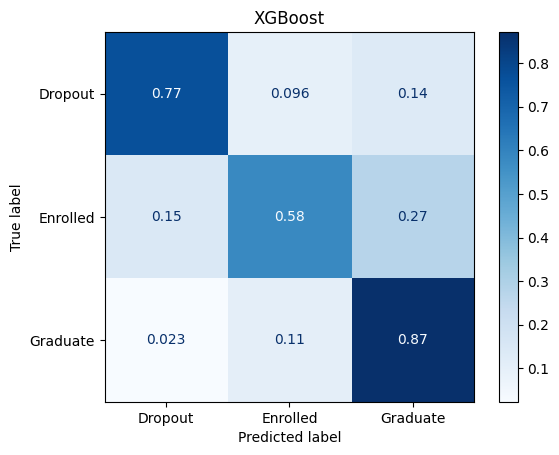

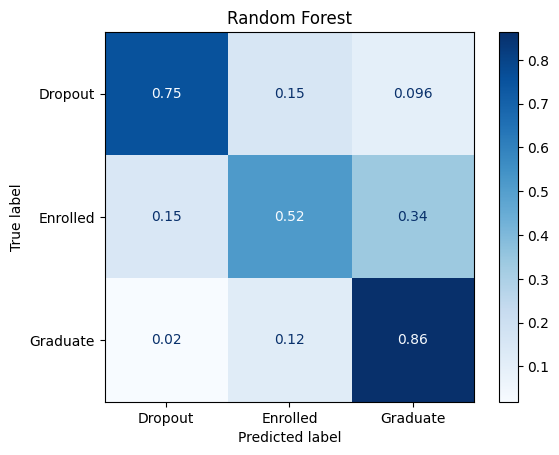

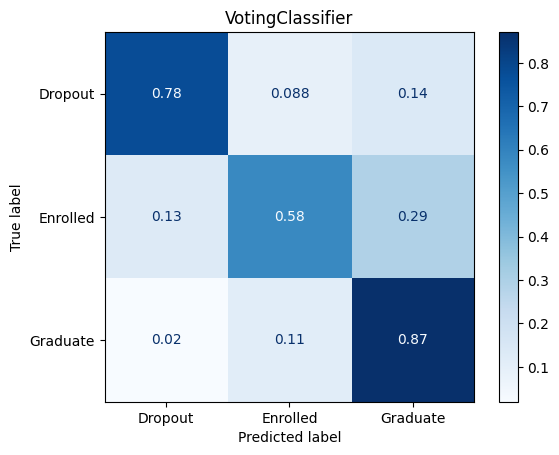

In [41]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
import pickle
from sklearn.metrics import confusion_matrix
import numpy as np

kf = KFold(n_splits=10)
kf.get_n_splits(X)
VCAcc = []
rfcAcc = []
xbcAcc = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i+1}:")
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    over = SMOTENC(categorical_features=list(range(len(categorical_features))), sampling_strategy='auto',random_state=42)
    pipeline = Pipeline(steps=[('o', over)])
    X_train, y_train = pipeline.fit_resample(X_train, y_train)

    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    rfc = RandomForestClassifier(n_estimators=175,random_state=48)
    xbc = XGBClassifier(learning_rate = 0.4,n_estimators=100,max_depth=5, tree_method = "hist", device = "cuda")
    VC = VotingClassifier(estimators=[('rfc', rfc), ('xbc',xbc)], voting='soft')

    VC.fit(X_train, y_train)
    y_pred = VC.predict(X_test)
    print("Voting Classifier Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")
    VCAcc.append(round(accuracy_score(y_test,y_pred)*100,2))
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    print("RandomForrest Accuracy     :",round(accuracy_score(y_test,y_pred)*100,2),"%")
    rfcAcc.append(round(accuracy_score(y_test,y_pred)*100,2))
    xbc.fit(X_train, y_train)
    y_pred = xbc.predict(X_test)
    print("XGB Classifier Accuracy    :",round(accuracy_score(y_test,y_pred)*100,2),"%")
    xbcAcc.append(round(accuracy_score(y_test,y_pred)*100,2))

    if i == 2:
        from sklearn.metrics import ConfusionMatrixDisplay
        pickle.dump(xbc,open("SMOTE_XGBoost.pkl",'wb'))
        pickle.dump(rfc,open("SMOTE_RF.pkl",'wb'))
        pickle.dump(VC,open("SMOTE_Voting.pkl",'wb'))
        titles = [("XGBoost",xbc),("Random Forest",rfc),("VotingClassifier",VC)]
        for title, classifier in titles:
            disp = ConfusionMatrixDisplay.from_estimator(
                classifier,
                X_test,
                y_test,
                display_labels=["Dropout",  "Enrolled",  "Graduate"],
                cmap=plt.cm.Blues,
                normalize='true',
            )
            y_pred = classifier.predict(X_test)
            confusion_matrix(y_pred=y_pred,y_true=y_test)
            print(title)
            print(classification_report(y_test,y_pred,target_names=['Dropout','Enrolled','Graduate']))
            getsSensitivityAndSpecificity(confusion_matrix(y_pred=y_pred,y_true=y_test),accuracy_score(y_test,y_pred))
            disp.ax_.set_title(title)
print(f"Voting Classifier Accuracy:{VCAcc} Average: {sum(VCAcc)/len(VCAcc)}")
print(f"RandomForrest     Accuracy:{rfcAcc} Average: {sum(rfcAcc)/len(rfcAcc)}")
print(f"XGB Classifier    Accuracy:{xbcAcc} Average: {sum(xbcAcc)/len(xbcAcc)}")

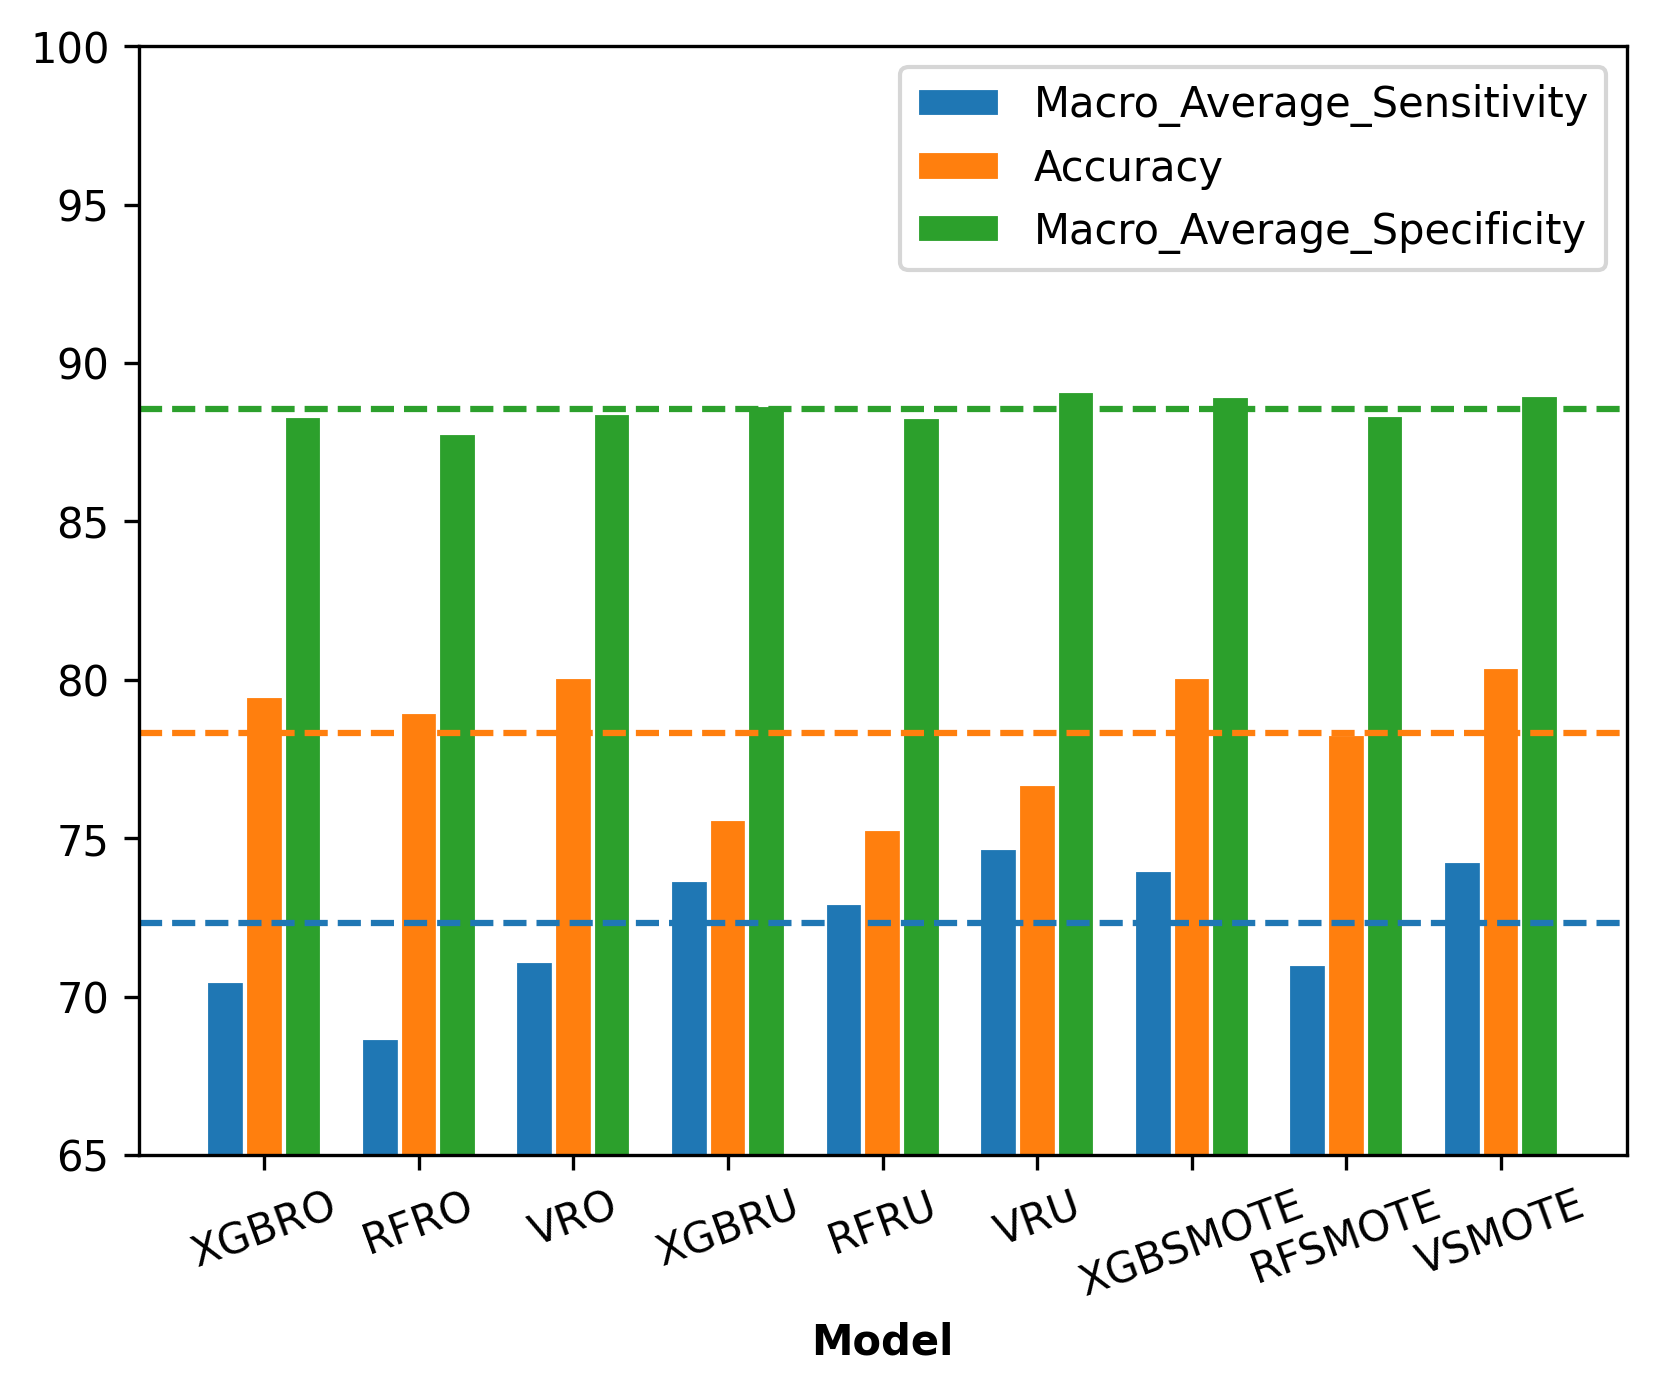

In [60]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.25

plt.figure(dpi=300)
labelNames = ['XGBRO','RFRO','VRO','XGBRU','RFRU','VRU','XGBSMOTE','RFSMOTE','VSMOTE']
# set heights of bars
Accuracy =                  [79.50, 79  , 80.10, 75.60, 75.30, 76.70, 80.10, 78.30, 80.4]
Macro_Average_Specificity = [88.33, 87.8, 88.43, 88.67, 88.30, 89.13, 88.97, 88.37, 89.00]
Macro_Average_Sensitivity=  [70.50, 68.7, 71.13, 73.67, 72.97, 74.70, 74.00, 71.03, 74.27]
 
# Set position of bar on X axis
r1 = np.arange(len(Accuracy))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
colors = ['#1f77b4','#ff7f0e','#2ca02c']

plt.axhline(sum(Macro_Average_Sensitivity)/len(Macro_Average_Sensitivity),color = colors[0],linestyle = '--')
plt.axhline(sum(Accuracy)/len(Accuracy),color = colors[1],linestyle = '--')
plt.axhline(sum(Macro_Average_Specificity)/len(Macro_Average_Specificity),color = colors[2],linestyle = '--')
# Make the plot
plt.bar(r1, Macro_Average_Sensitivity, color=colors[0], width=barWidth, edgecolor='white', label='Macro_Average_Sensitivity')
plt.bar(r2, Accuracy, color=colors[1], width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r3, Macro_Average_Specificity, color=colors[2], width=barWidth, edgecolor='white', label='Macro_Average_Specificity')

plt.ylim(65,100)

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Accuracy))], labelNames, rotation=20)
 
# Create legend & Show graphic
plt.legend()
plt.show()